In [76]:
import pandas as pd
import seaborn as sns
import BabsonAnalytics
import numpy as np
%matplotlib inline

In [77]:
df = pd.read_csv('../data/RidingMowers.csv')
df.head()

,Income,Lot_Size,Owner
0,60.0,18.4,1
1,85.5,16.8,1
2,64.8,21.6,1
3,61.5,20.8,1
4,87.0,23.6,1


In [84]:
df.Owner = df.Owner.astype("category")

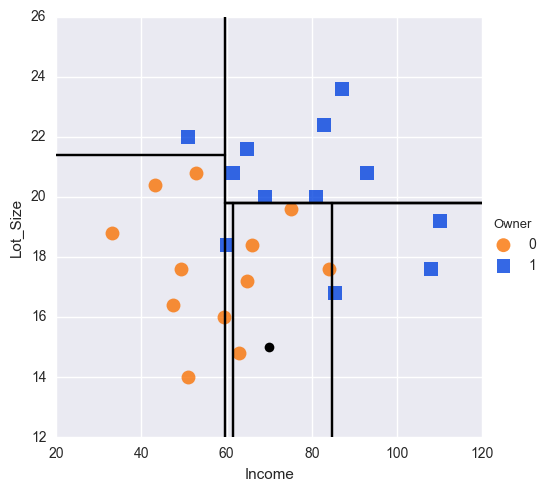

In [112]:
import seaborn as sns

col_list = ["orange", "blue"]
col_list_palette = sns.xkcd_palette(col_list)
sns.set_palette(col_list_palette)
sns.lmplot('Income','Lot_Size',
           data=df,
           fit_reg=False,
           hue='Owner', 
           markers = ['o','s'],
           scatter_kws={"s": 100})

plt.savefig('../figures/tree_0.pdf')

plt.plot([59.7, 59.7],[12,26],'k')
plt.ylim((12,26))
plt.savefig('../figures/tree_1.pdf')

plt.plot([20,59.7],[21.4, 21.4],'k')
plt.xlim((20,120))
plt.savefig('../figures/tree_2.pdf')

plt.plot([59.7,120],[19.8, 19.8],'k')
plt.xlim((20,120))
plt.savefig('../figures/tree_3.pdf')

plt.plot([59.7,120],[19.8, 19.8],'k')
plt.xlim((20,120))
plt.savefig('../figures/tree_3.pdf')

plt.plot([84.75, 84.75],[12, 19.8],'k')
plt.xlim((20,120))
plt.savefig('../figures/tree_4.pdf')

plt.plot([61.5, 61.5],[12, 19.8],'k')
plt.xlim((20,120))
plt.savefig('../figures/tree_5.pdf')


plt.plot(70,15,'ko')
plt.savefig('../figures/tree_test.pdf')

In [72]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(df.drop('Owner',axis=1),df.Owner)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

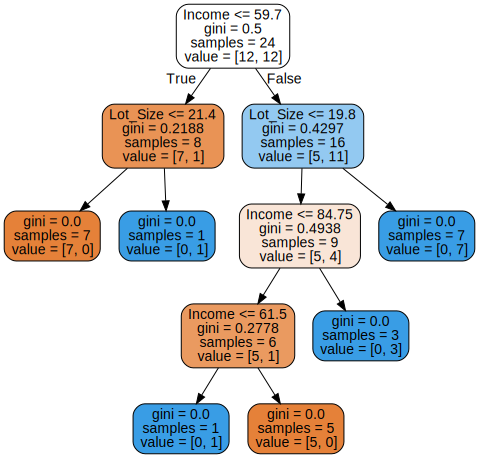

In [81]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model, out_file="mytree.dot",feature_names=train.columns,filled=True,rounded=True)
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)